In [36]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/sensitivity_conjugate/'
os.chdir(working_dir)

In [37]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [38]:
import shutil

dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs)


['seed_7__dim_10__complete', 'seed_6__dim_2__complete', 'seed_2__dim_10__complete', 'seed_14__dim_2__complete', 'seed_9__dim_2__complete', 'seed_6__dim_10__complete', 'seed_10__dim_2__complete', 'seed_3__dim_10__complete', 'seed_2__dim_2__complete', 'seed_19__dim_10__complete', 'seed_5__dim_10__complete', 'seed_7__dim_2__complete', 'seed_0__dim_10__complete', 'seed_15__dim_2__complete', 'seed_18__dim_10__complete', 'seed_4__dim_10__complete', 'seed_11__dim_2__complete', 'seed_8__dim_2__complete', 'seed_1__dim_10__complete', 'seed_3__dim_2__complete', 'seed_16__dim_2__complete', 'seed_8__dim_10__complete', 'seed_14__dim_10__complete', 'seed_4__dim_2__complete', 'seed_11__dim_10__complete', 'seed_9__dim_10__complete', 'seed_15__dim_10__complete', 'seed_0__dim_2__complete', 'seed_19__dim_2__complete', 'seed_10__dim_10__complete', 'seed_12__dim_2__complete', 'seed_16__dim_10__complete', 'seed_17__dim_2__complete', 'seed_13__dim_10__complete', 'seed_5__dim_2__complete', 'seed_18__dim_2__com

In [45]:
def robust_mean_se(arr):
    arr = np.log(arr)
    min_index = np.argmin(arr)
    max_index = np.argmax(arr)

    # Delete the minimum and maximum elements
    arr = np.delete(arr, min_index)
    arr = np.delete(arr, max_index - 1 if max_index > min_index else max_index)
    
    # print(arr)
    
    m = np.median(arr)
    se = scipy.stats.sem(arr)
    
    confidence_level = 0.95
    degrees_of_freedom = len(arr) - 1
    lower, upper = stats.t.interval(confidence_level, degrees_of_freedom, m, se)
    
    return np.exp(m), np.exp(lower), np.exp(2 * m - lower)

In [46]:

dir_num = len(dirs)

# N_alpha_array = jnp.array([5])
Nx_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

# N_theta_array = jnp.array([30])
Ny_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

# dim_all = jnp.array([2, 4, 6, 8, 10])
dim_all = jnp.array([2, 10])
seed_num = 10


MSE_dict_all_dim_fix_x = {}

for dim in dim_all:
    MSE_dict = {}

    dir_temp = []
    for filename in dirs:
        if f'dim_{dim}' in filename:
            dir_temp.append(filename)
    dir_num_temp = len(dir_temp)
    print(dim)
    
    for Nx in Nx_array:
        MSE_dict_temp = {}

        MSE_dict_temp['BMC mean'] = np.zeros(len(Ny_array))
        MSE_dict_temp['BMC lower'] = np.zeros(len(Ny_array))
        MSE_dict_temp['BMC upper'] = np.zeros(len(Ny_array))
        
        MSE_dict_temp['LSMC mean'] = np.zeros(len(Ny_array))
        MSE_dict_temp['LSMC lower'] = np.zeros(len(Ny_array))
        MSE_dict_temp['LSMC upper'] = np.zeros(len(Ny_array))
        
        MSE_dict_temp['IS mean'] = np.zeros(len(Ny_array))
        MSE_dict_temp['IS lower'] = np.zeros(len(Ny_array))
        MSE_dict_temp['IS upper'] = np.zeros(len(Ny_array))
        
        MSE_dict_temp['KMS mean'] = np.zeros(len(Ny_array))
        MSE_dict_temp['KMS lower'] = np.zeros(len(Ny_array))
        MSE_dict_temp['KMS upper'] = np.zeros(len(Ny_array))

        for i, Ny in enumerate(Ny_array):
            mse_BMC = np.zeros(dir_num_temp)
            mse_LSMC = np.zeros(dir_num_temp)
            mse_IS = np.zeros(dir_num_temp)
            mse_KMS = np.zeros(dir_num_temp)
            
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                mse_BMC[l] = dict_all['BMC']
                mse_LSMC[l] = dict_all['LSMC']
                mse_IS[l] = dict_all['IS']
                mse_KMS[l] = dict_all['KMS']
            
            MSE_dict_temp['BMC mean'][i], MSE_dict_temp['BMC lower'][i], MSE_dict_temp['BMC upper'][i] = robust_mean_se(mse_BMC)
            MSE_dict_temp['LSMC mean'][i], MSE_dict_temp['LSMC lower'][i], MSE_dict_temp['LSMC upper'][i] = robust_mean_se(mse_LSMC)
            MSE_dict_temp['IS mean'][i], MSE_dict_temp['IS lower'][i], MSE_dict_temp['IS upper'][i] = robust_mean_se(mse_IS)
            MSE_dict_temp['KMS mean'][i], MSE_dict_temp['KMS lower'][i], MSE_dict_temp['KMS upper'][i] = robust_mean_se(mse_KMS)

        MSE_dict[f"{Nx}"] = MSE_dict_temp

    MSE_dict_all_dim_fix_x[f"{dim}"] = MSE_dict

2
10


In [47]:

dir_num = len(dirs)

# N_alpha_array = jnp.array([5])
Nx_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

# N_theta_array = jnp.array([30])
Ny_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

# dim_all = jnp.array([2, 4, 6, 8, 10])
dim_all = jnp.array([2, 10])
seed_num = 10


MSE_dict_all_dim_fix_y = {}

for dim in dim_all:
    MSE_dict = {}

    dir_temp = []
    for filename in dirs:
        if f'dim_{dim}' in filename:
            dir_temp.append(filename)
    dir_num_temp = len(dir_temp)
    print(dim)
    
    for Ny in Ny_array:
        MSE_dict_temp = {}

        MSE_dict_temp['BMC mean'] = np.zeros(len(Nx_array))
        MSE_dict_temp['BMC lower'] = np.zeros(len(Nx_array))
        MSE_dict_temp['BMC upper'] = np.zeros(len(Nx_array))
        
        MSE_dict_temp['LSMC mean'] = np.zeros(len(Nx_array))
        MSE_dict_temp['LSMC lower'] = np.zeros(len(Nx_array))
        MSE_dict_temp['LSMC upper'] = np.zeros(len(Nx_array))
        
        MSE_dict_temp['IS mean'] = np.zeros(len(Nx_array))
        MSE_dict_temp['IS lower'] = np.zeros(len(Nx_array))
        MSE_dict_temp['IS upper'] = np.zeros(len(Nx_array))
        
        MSE_dict_temp['KMS mean'] = np.zeros(len(Nx_array))
        MSE_dict_temp['KMS lower'] = np.zeros(len(Nx_array))
        MSE_dict_temp['KMS upper'] = np.zeros(len(Nx_array))


        for i, Nx in enumerate(Nx_array):
            mse_BMC = np.zeros(dir_num_temp)
            mse_LSMC = np.zeros(dir_num_temp)
            mse_IS = np.zeros(dir_num_temp)
            mse_KMS = np.zeros(dir_num_temp)
            
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                mse_BMC[l] = dict_all['BMC']
                mse_LSMC[l] = dict_all['LSMC']
                mse_IS[l] = dict_all['IS']
                mse_KMS[l] = dict_all['KMS']
            
            MSE_dict_temp['BMC mean'][i], MSE_dict_temp['BMC lower'][i], MSE_dict_temp['BMC upper'][i] = robust_mean_se(mse_BMC)
            MSE_dict_temp['LSMC mean'][i], MSE_dict_temp['LSMC lower'][i], MSE_dict_temp['LSMC upper'][i] = robust_mean_se(mse_LSMC)
            MSE_dict_temp['IS mean'][i], MSE_dict_temp['IS lower'][i], MSE_dict_temp['IS upper'][i] = robust_mean_se(mse_IS)
            MSE_dict_temp['KMS mean'][i], MSE_dict_temp['KMS lower'][i], MSE_dict_temp['KMS upper'][i] = robust_mean_se(mse_KMS)

        MSE_dict[f"{Ny}"] = MSE_dict_temp

    MSE_dict_all_dim_fix_y[f"{dim}"] = MSE_dict

2
10


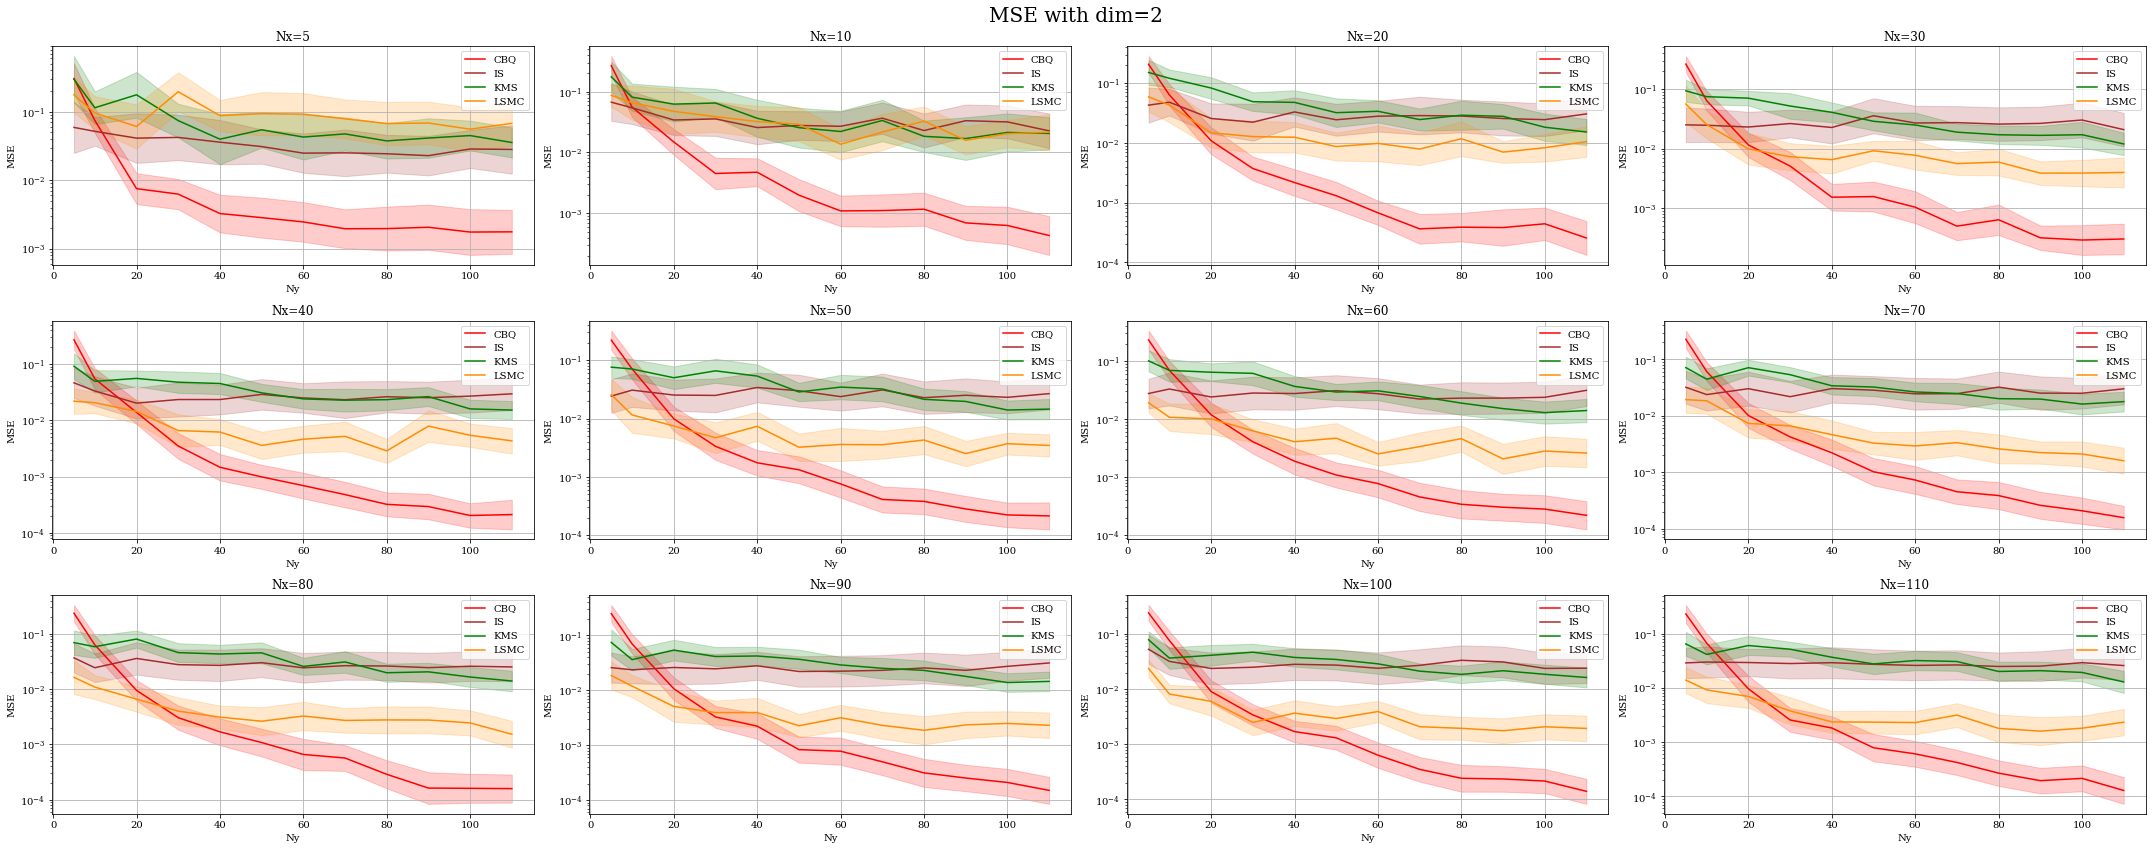

In [48]:
dim = 2

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
    
plt.suptitle(f'MSE with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

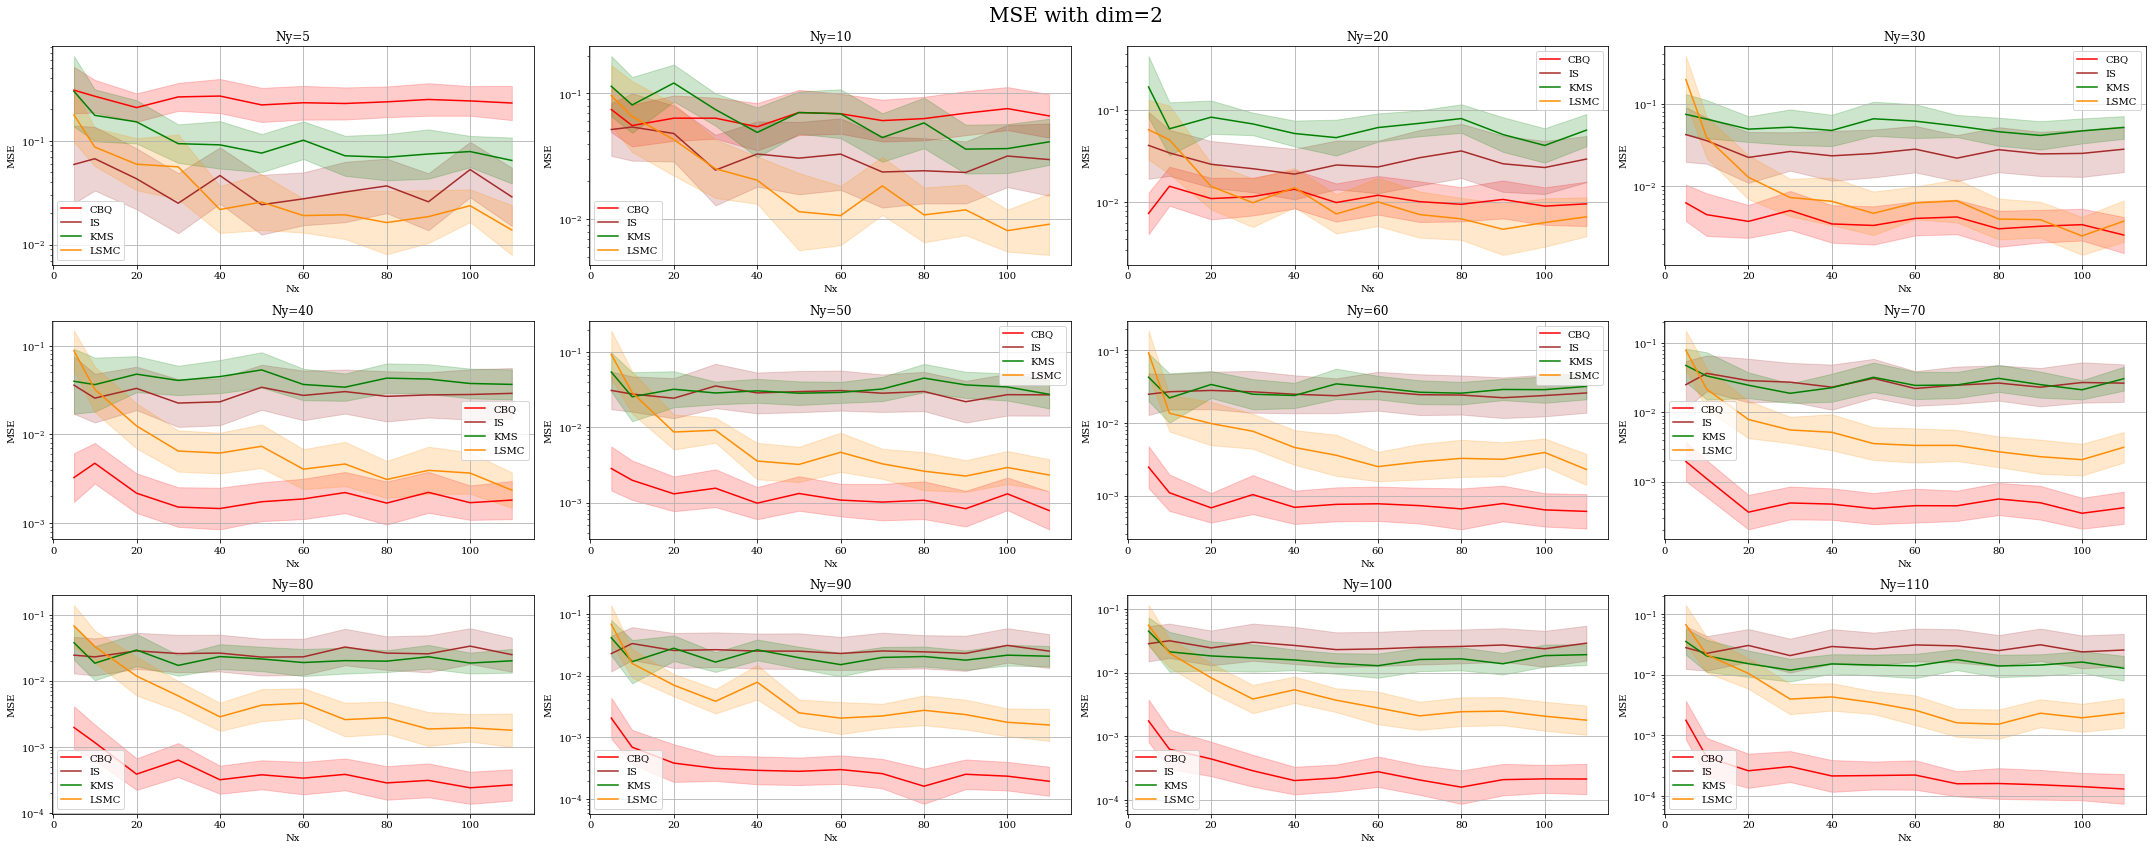

In [60]:
dim = 2

fig, axs = plt.subplots(int(len(Ny_array) / 4), 4, figsize=(30, len(Ny_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Ny = Ny_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS upper'],
                        color='brown', alpha=0.2)
     
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Nx')
    axs[i].set_title(f'Ny={Ny}')
    
plt.suptitle(f'MSE with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

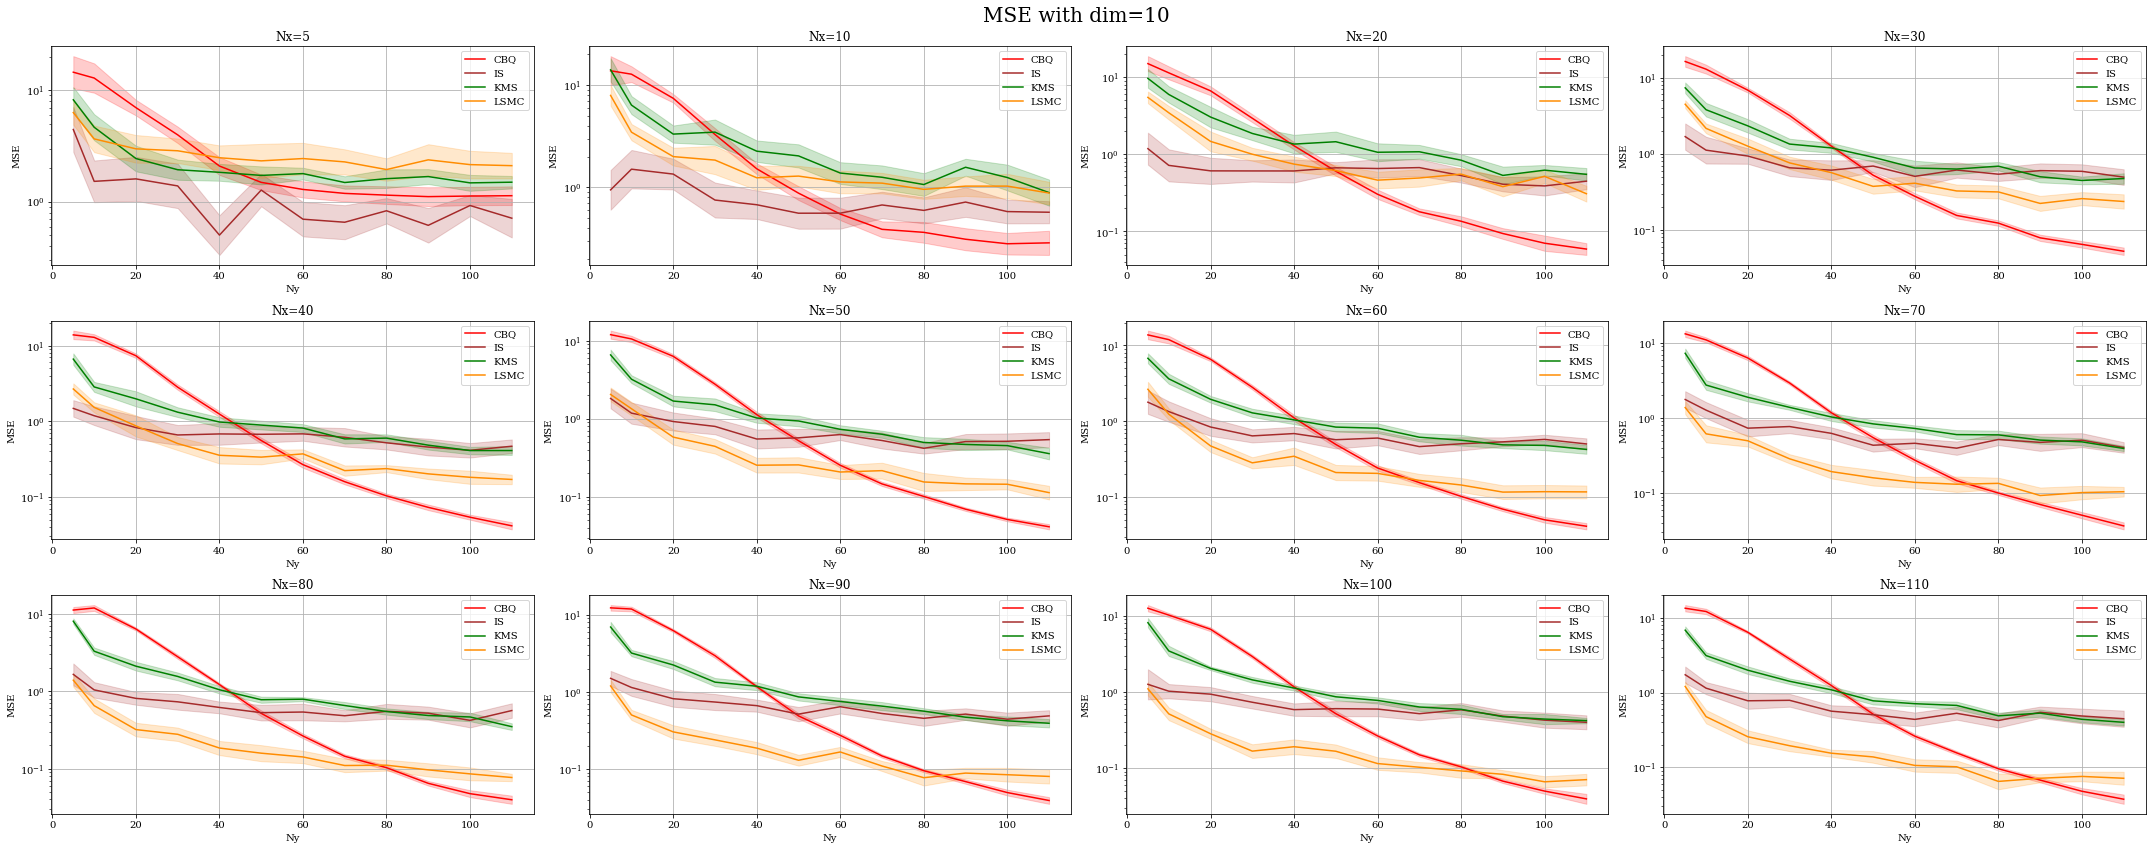

In [61]:
dim = 10

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC lower'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
    
plt.suptitle(f'MSE with dim={dim}', fontsize = 20)
plt.tight_layout()
plt.show()

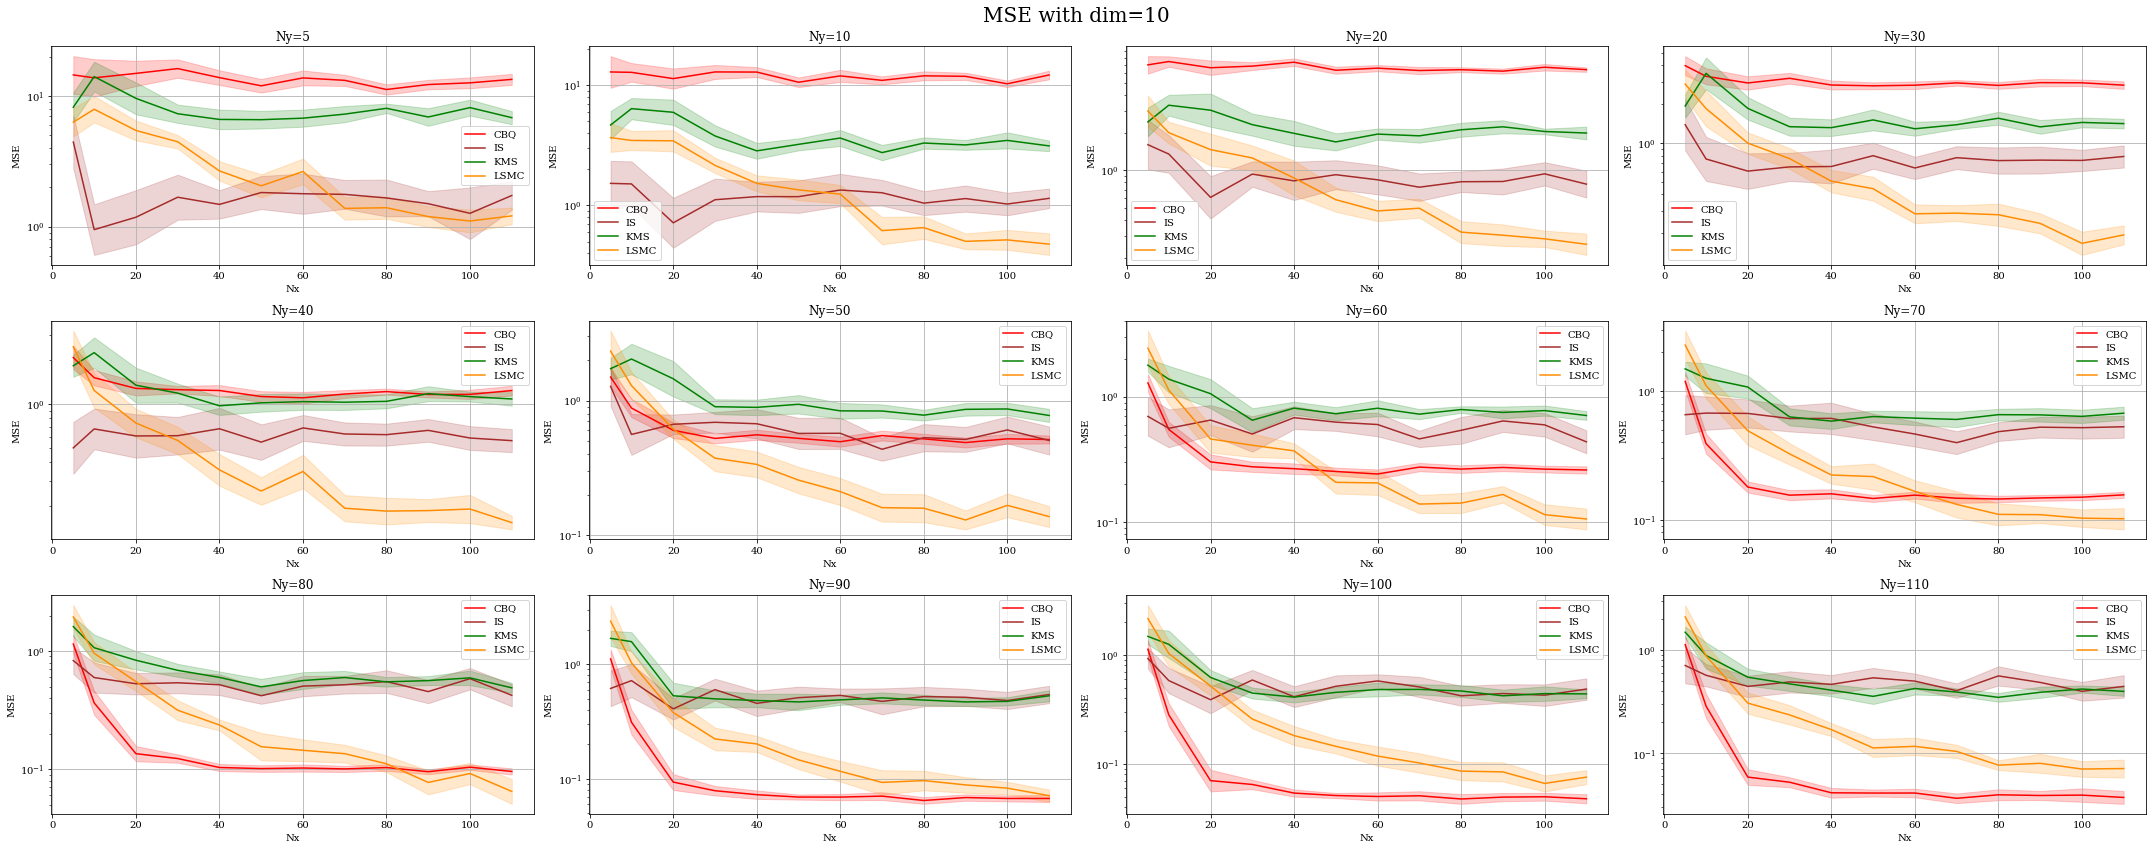

In [64]:
dim = 10

fig, axs = plt.subplots(int(len(Ny_array) / 4), 4, figsize=(30, len(Ny_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Ny = Ny_array[i]

    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC lower'], 
                        MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Nx')
    axs[i].set_title(f'Ny={Ny}')
    
plt.suptitle(f'MSE with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

In [63]:
MSE_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC mean']

array([1.13354811, 0.28749783, 0.05892114, 0.05255094, 0.04150468,
       0.04125744, 0.04127795, 0.03670249, 0.03968449, 0.03907773,
       0.0394165 , 0.03740556])

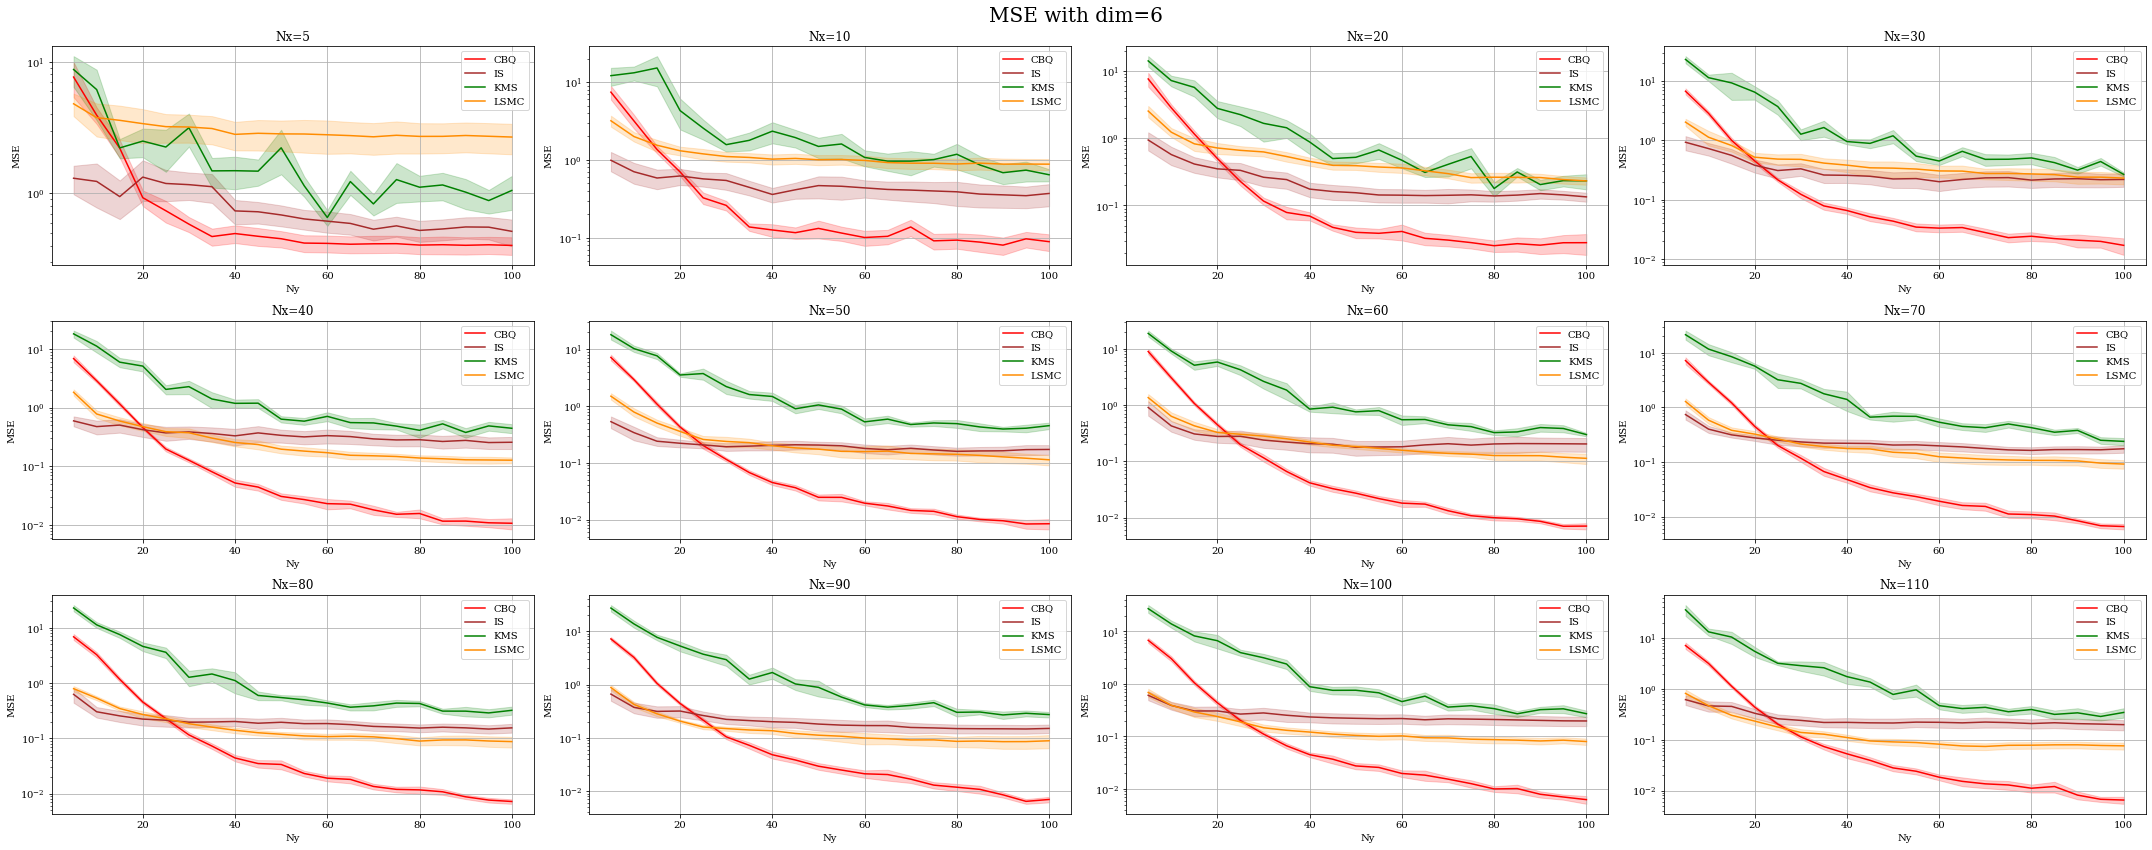

In [13]:
dim = 6

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.suptitle(f'MSE with dim={dim}', fontsize = 20)
plt.tight_layout()
plt.show()

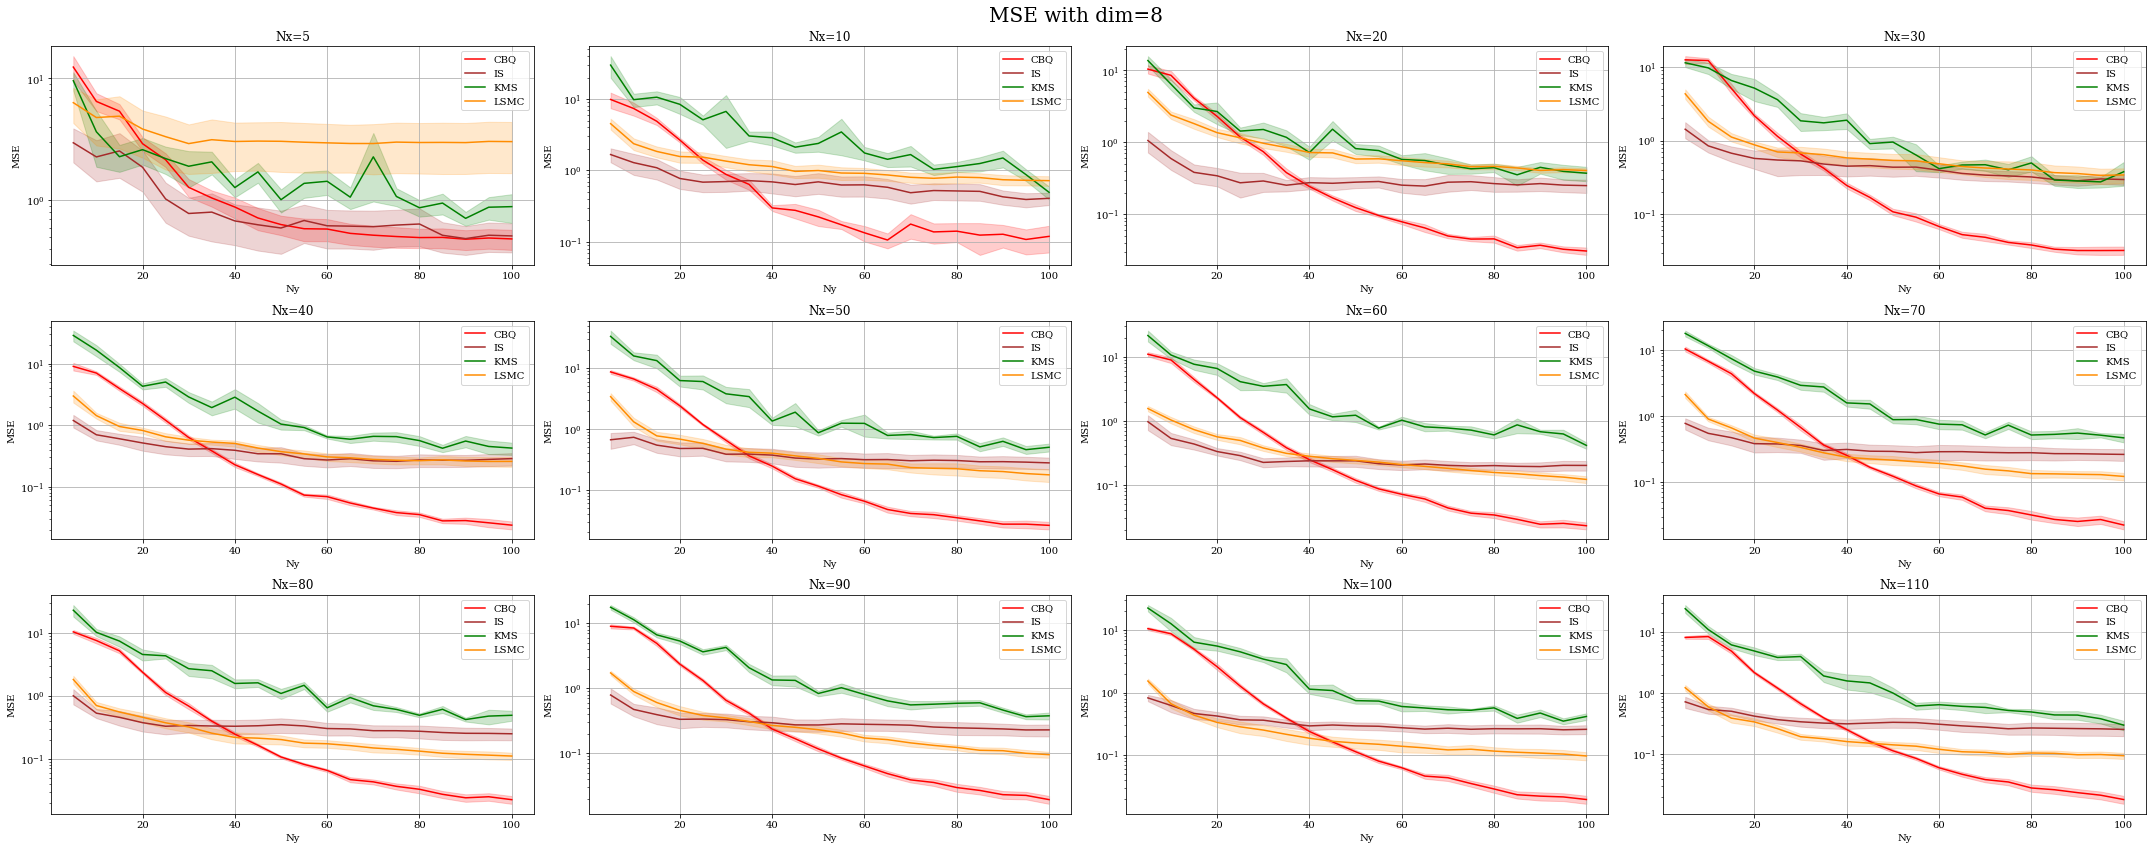

In [14]:
dim = 8

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.suptitle(f'MSE with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

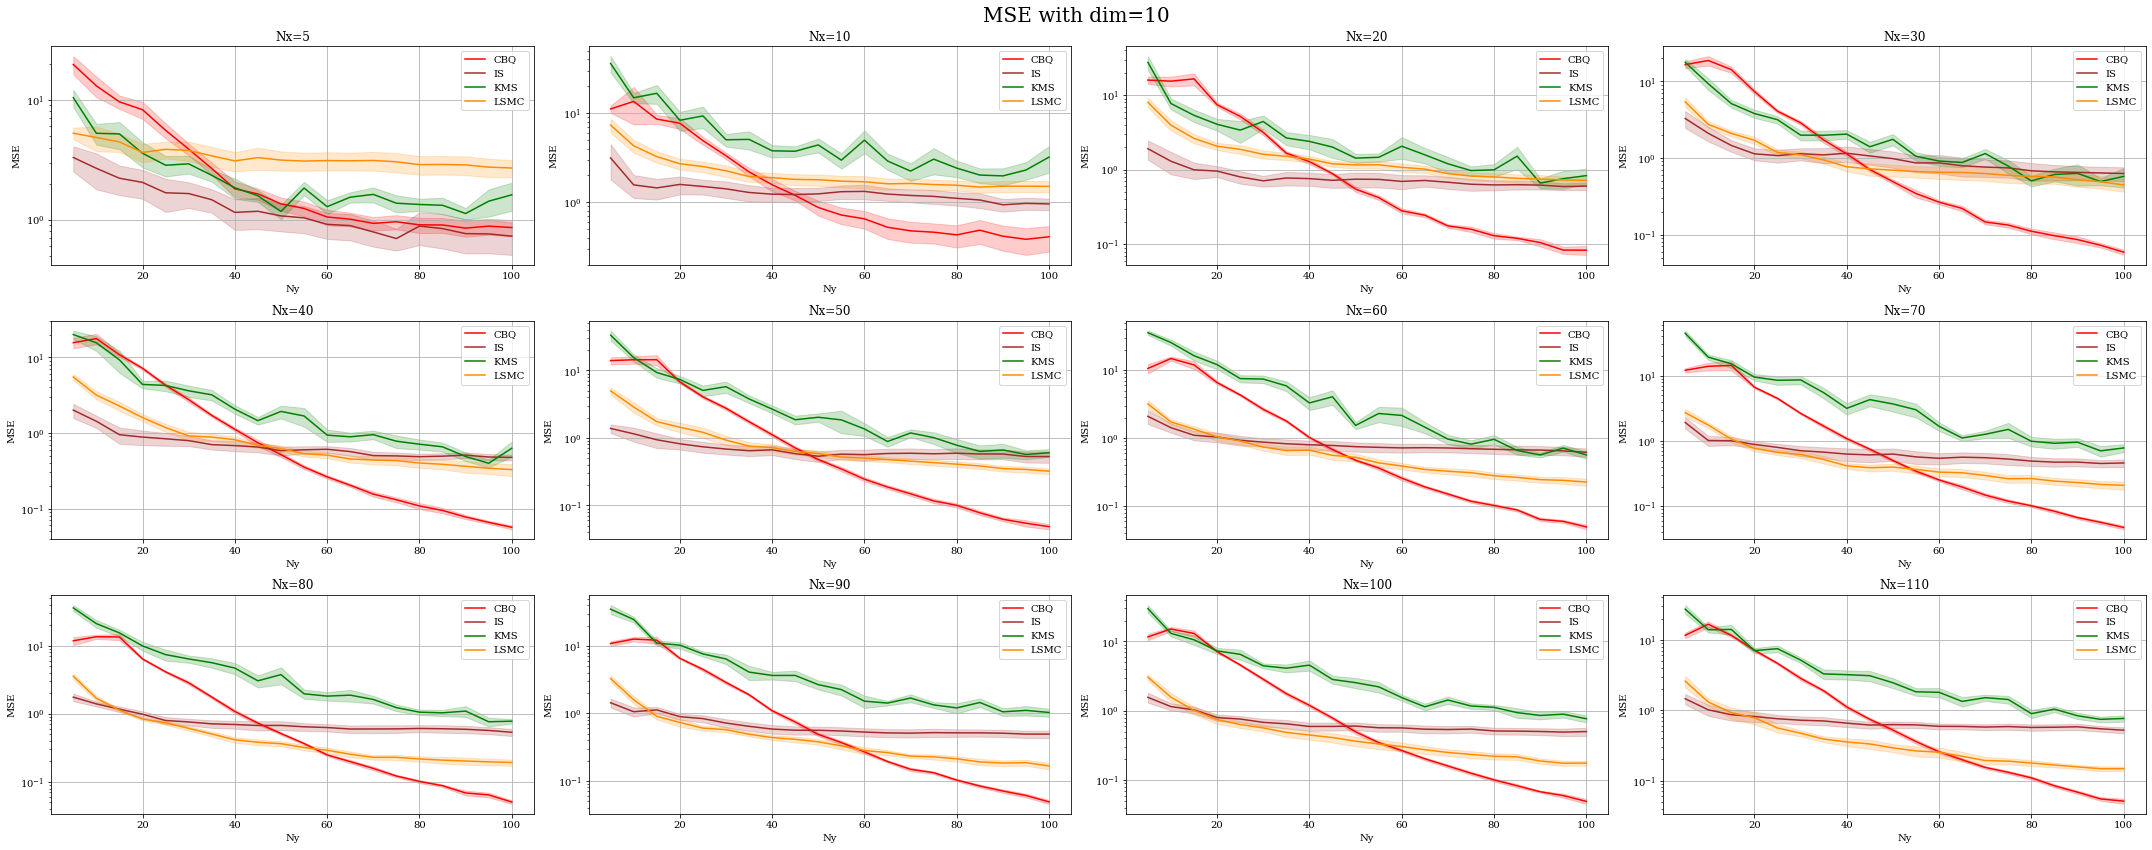

In [15]:
dim = 10

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC se'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS se'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS se'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'] - MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC se'], 
                        MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'] + MSE_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC se'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.suptitle(f'MSE with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

In [57]:
dim = 2

large_Nx_array = [1000]
large_Ny_array = [1000]

dir_temp = []
for filename in dirs:
    if f'dim_{dim}' in filename:
        dir_temp.append(filename)
dir_num_temp = len(dir_temp)
print(dim)
    
for Nx in large_Nx_array:
    for Ny in large_Ny_array:
        time_KMS_large = np.zeros(dir_num_temp)
        time_LSMC_large = np.zeros(dir_num_temp)
        time_IS_large = np.zeros(dir_num_temp)
        
        mse_KMS_large = np.zeros(dir_num_temp)
        mse_LSMC_large = np.zeros(dir_num_temp)
        mse_IS_large = np.zeros(dir_num_temp)
        
        for l, d in enumerate(dir_temp):
            with open(f"{d}/time_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                time_KMS_large[l] = dummy_dict['KMS']
                time_LSMC_large[l] = dummy_dict['LSMC']
                time_IS_large[l] = dummy_dict['IS']
                
            with open(f"{d}/mse_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                mse_KMS_large[l] = dummy_dict['KMS']
                mse_LSMC_large[l] = dummy_dict['LSMC']
                mse_IS_large[l] = dummy_dict['IS']

                
print('===== MSE =====')
print(f'KMS with large samples has MSE {mse_KMS_large.mean()}')
print(f'LSMC with large samples has MSE {mse_LSMC_large.mean()}')
print(f'IS with large samples has MSE {mse_IS_large.mean()}')


print('===== Time =====')
print(f'KMS with large samples has Time {time_KMS_large.mean()}')
print(f'LSMC with large samples has Time {time_LSMC_large.mean()}')
print(f'IS with large samples has Time {time_IS_large.mean()}')


2
===== MSE =====
KMS with large samples has MSE 1.2010619229840813e-05
LSMC with large samples has MSE 8.901294822862837e-05
IS with large samples has MSE 0.007280659582465887
===== Time =====
KMS with large samples has Time 59.89448001384735
LSMC with large samples has Time 0.223641300201416
IS with large samples has Time 15.147953176498413


In [58]:
dim = 4

large_Nx_array = [1000]
large_Ny_array = [1000]

dir_temp = []
for filename in dirs:
    if f'dim_{dim}' in filename:
        dir_temp.append(filename)
dir_num_temp = len(dir_temp)
print(dim)
    
for Nx in large_Nx_array:
    for Ny in large_Ny_array:
        time_KMS_large = np.zeros(dir_num_temp)
        time_LSMC_large = np.zeros(dir_num_temp)
        time_IS_large = np.zeros(dir_num_temp)
        
        mse_KMS_large = np.zeros(dir_num_temp)
        mse_LSMC_large = np.zeros(dir_num_temp)
        mse_IS_large = np.zeros(dir_num_temp)
        
        for l, d in enumerate(dir_temp):
            with open(f"{d}/time_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                time_KMS_large[l] = dummy_dict['KMS']
                time_LSMC_large[l] = dummy_dict['LSMC']
                time_IS_large[l] = dummy_dict['IS']
                
            with open(f"{d}/mse_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                mse_KMS_large[l] = dummy_dict['KMS']
                mse_LSMC_large[l] = dummy_dict['LSMC']
                mse_IS_large[l] = dummy_dict['IS']

                
print('===== MSE =====')
print(f'KMS with large samples has MSE {mse_KMS_large.mean()}')
print(f'LSMC with large samples has MSE {mse_LSMC_large.mean()}')
print(f'IS with large samples has MSE {mse_IS_large.mean()}')


print('===== Time =====')
print(f'KMS with large samples has Time {time_KMS_large.mean()}')
print(f'LSMC with large samples has Time {time_LSMC_large.mean()}')
print(f'IS with large samples has Time {time_IS_large.mean()}')


4
===== MSE =====
KMS with large samples has MSE 0.00013842180087522137
LSMC with large samples has MSE 0.0008575656403991161
IS with large samples has MSE 0.012202474940568208
===== Time =====
KMS with large samples has Time 69.36709153652191
LSMC with large samples has Time 0.24810080528259276
IS with large samples has Time 18.172288489341735


In [59]:
dummy_dict

{'BMC': None,
 'KMS': Array(2.3769928e-05, dtype=float32),
 'LSMC': Array(4.0302006e-05, dtype=float32),
 'IS': Array(0.00995971, dtype=float32)}

In [33]:
d = 'seed_3__dim_10__complete'
# Nx_array = [5, 10, 20, 30]
Nx_array = jnp.arange(2, 50, 2)
# Ny_array = np.arange(3, 100, 3)
Ny_array = jnp.arange(2, 50, 2)

for Nx in Nx_array:
    for Ny in Ny_array:
        with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
            dict_all = pickle.load(f)
        mse_IS[l] = dict_all['KMS']
        print(dict_all['KMS'])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [28]:
d = 'seed_2__dim_10__complete'
# Nx_array = [5, 10, 20, 30]
Nx_array = jnp.arange(2, 50, 2)
# Ny_array = np.arange(3, 100, 3)
Ny_array = jnp.arange(2, 50, 2)

ground_truth = jnp.load(f'./{d}/ground_truth.npy')
print(ground_truth)

[0.00088432 0.00154425 0.00214434 0.00210967 0.00177842 0.00217454
 0.00281297 0.00152706 0.00306545 0.00126942 0.00205033 0.00252621
 0.00115319 0.00157638 0.00110927 0.00115611 0.00071012 0.00188775
 0.00128675 0.0020977  0.00158398 0.00230025 0.00208946 0.00012359
 0.00272813 0.00120384 0.00135439 0.0017695  0.0014472  0.00264115
 0.00103491 0.00302132 0.00079415 0.00157597 0.00199274 0.0014192
 0.00160719 0.00109313 0.00289283 0.00182105 0.0018394  0.00194576
 0.00295531 0.00251809 0.00190227 0.00236058 0.00090539 0.00092705
 0.00123213 0.0018727  0.00263062 0.00234498 0.00200051 0.00231809
 0.00157151 0.00193128 0.00215749 0.00269    0.00193347 0.00249599
 0.00165923 0.00267569 0.0018071  0.00206142 0.00161799 0.00089571
 0.00299929 0.00242961 0.0009235  0.00120456 0.00177303 0.0016254
 0.00145906 0.00276497 0.0028033  0.00187347 0.00261811 0.00222812
 0.00141353 0.00150823 0.00221259 0.00188959 0.00280111 0.00307283
 0.00152521 0.00199266 0.0028944  0.00185755 0.00187253 0.000936